<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2896 entries, 2014-12-09 to 2022-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2896 non-null   float64
 1   High       2896 non-null   float64
 2   Low        2896 non-null   float64
 3   Close      2896 non-null   float64
 4   Adj Close  2896 non-null   float64
 5   Volume     2896 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 158.4 KB


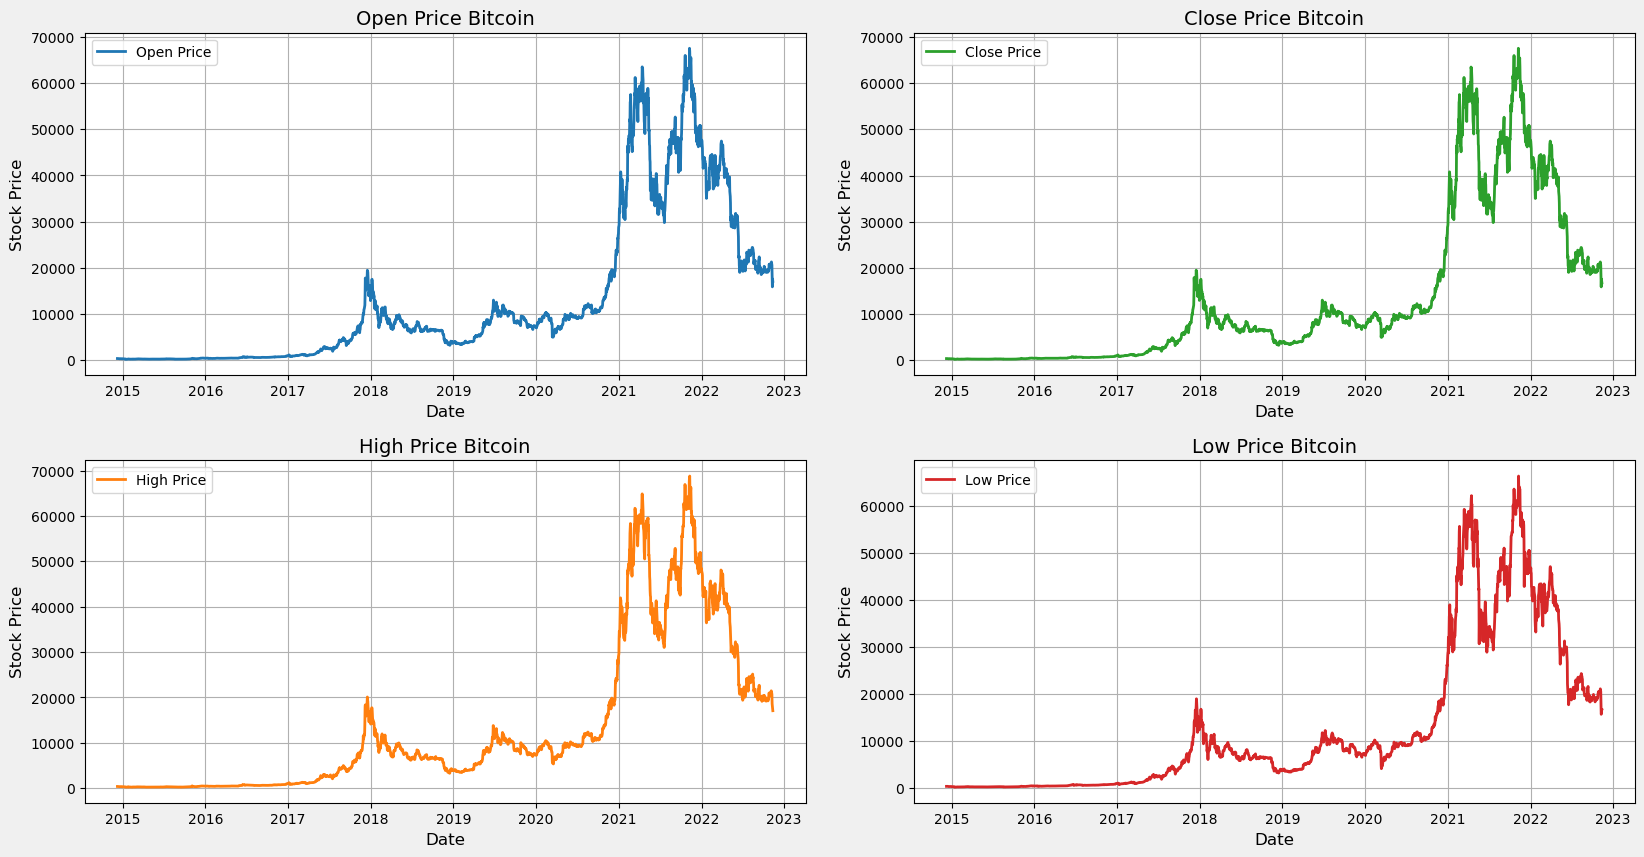

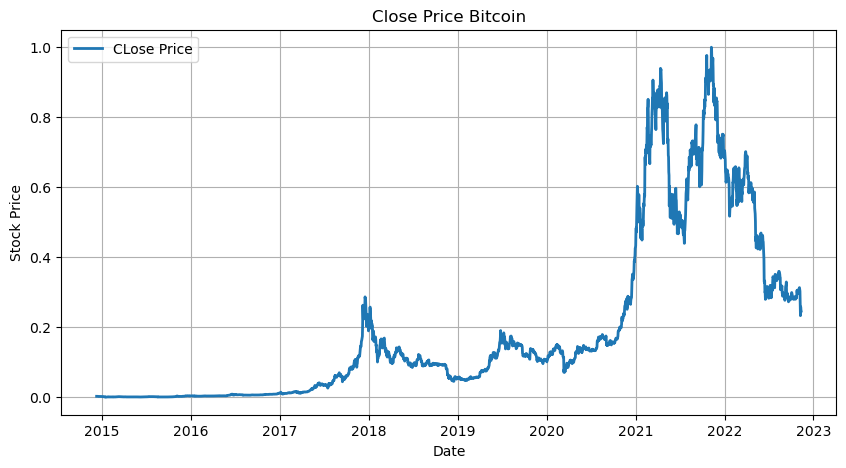

(2256, 60) (2256,)
(520, 60) (520,)
(2256, 60, 1) (520, 60, 1)


In [1]:
from ipynb.fs.full.class_praproses_data import *

### 5. Modeling LSTM-RNN

In [2]:
tf.random.set_seed(1234)

In [3]:
# The LSTM-RNN architecture
model = tf.keras.Sequential([
    
    # First LSTM layer with Dropout regularisation
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1))
    ),
    
    # Secound LSTM layer with Dropout regularisation
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=50, return_sequences=False)
    ),
    
    # Dropout layer 5%
    tf.keras.layers.Dropout(0.02),
    
    # The output layer
    tf.keras.layers.Dense(1)
])

In [4]:
# Compile the model LSTM
model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
# fit network
history = model.fit(x_train, y_train, batch_size=8, epochs=50, verbose=1, use_multiprocessing=True, shuffle=False)

Epoch 1/50
282/282 [==============================] - 25s 48ms/step - loss: 0.0012
Epoch 2/50
282/282 [==============================] - 14s 49ms/step - loss: 0.0031
Epoch 3/50
282/282 [==============================] - 14s 49ms/step - loss: 0.0045
Epoch 4/50
282/282 [==============================] - 14s 49ms/step - loss: 0.0033
Epoch 5/50
282/282 [==============================] - 14s 50ms/step - loss: 0.0018
Epoch 6/50
282/282 [==============================] - 14s 49ms/step - loss: 6.8971e-04
Epoch 7/50
282/282 [==============================] - 14s 48ms/step - loss: 2.9040e-04
Epoch 8/50
282/282 [==============================] - 14s 49ms/step - loss: 1.6936e-04
Epoch 9/50
282/282 [==============================] - 14s 49ms/step - loss: 1.4809e-04
Epoch 10/50
282/282 [==============================] - 15s 52ms/step - loss: 1.5606e-04
Epoch 11/50
282/282 [==============================] - 7s 26ms/step - loss: 1.5478e-04
Epoch 12/50
282/282 [==============================] - 7s 25ms

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (8, 60, 100)              20800     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (8, 100)                  60400     
 onal)                                                           
                                                                 
 dropout (Dropout)           (8, 100)                  0         
                                                                 
 dense (Dense)               (8, 1)                    101       
                                                                 
Total params: 81301 (317.58 KB)
Trainable params: 81301 (317.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
predictions = model.predict(x_test)

17/17 [==============================] - 3s 14ms/step


In [8]:
print(predictions[:7])

[[0.55426645]
 [0.56400543]
 [0.53668535]
 [0.58731425]
 [0.6050734 ]
 [0.60628724]
 [0.57145303]]


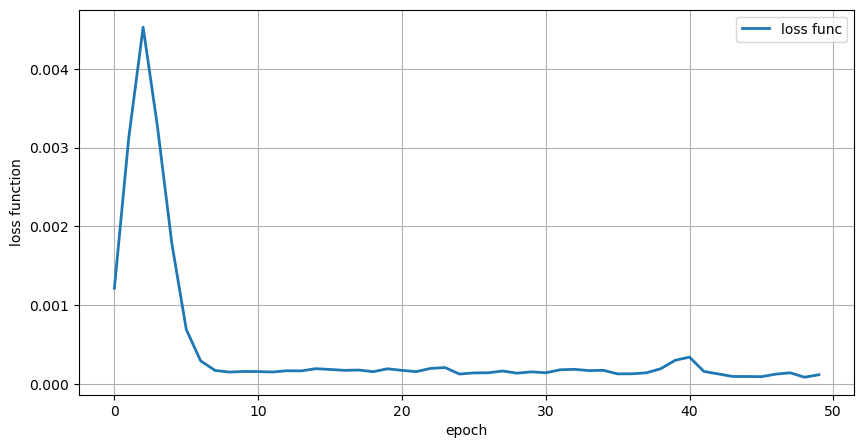

In [9]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(history.history['loss'], color="tab:blue", label="loss func", linewidth=2)

# membuat label-label
ax.set_xlabel("epoch", fontsize=10)
ax.set_ylabel("loss function", fontsize=10)
ax.legend(loc='upper right')
ax.grid(True)

# menampilkan plot
plt.show()

### 6. Evaluasi Model LSTM-RNN

In [10]:
scores = model.evaluate(x_train, y_train)
scores

71/71 [==============================] - 3s 21ms/step - loss: 2.7023e-04


0.000270232034381479

In [11]:
scores = model.evaluate(x_test, y_test)
scores

17/17 [==============================] - 1s 28ms/step - loss: 4.8397e-04


0.00048397379578091204

- MAE (Mean Absolute Error)

In [12]:
mae = mean_absolute_error(y_test, predictions) * 100
print('Test MAE : %.2f' % mae)

Test MAE : 1.59


- MSE (Mean Squared Error)

In [13]:
mse = mean_squared_error(y_test, predictions) * 100
print('Test MSE: %.2f' % mse)

Test MSE: 0.05


- RMSE (Root Mean Squared Error)

In [14]:
rmse = sqrt(mse) * 100
print('Test RMSE: %.2f' % rmse)

Test RMSE: 22.00


- MAPE (Absolute Percentage Error)

In [15]:
mape = mean_absolute_percentage_error(y_test, predictions) * 100
print('Test MAPE: %.2f' % mape)

Test MAPE: 2.91


- Corelation pearson

In [16]:
hasil = np.stack((y_test.reshape(-1), predictions.reshape(-1)), axis=1)
hasil = pd.DataFrame(hasil, columns = ['data_aktual','prediksi'])
hasil.head()

,data_aktual,prediksi
0,0.551373,0.554266
1,0.524931,0.564005
2,0.577541,0.536685
3,0.594170,0.587314
4,0.596957,0.605073


In [17]:
r, p = sc.pearsonr(hasil["data_aktual"], hasil["prediksi"])
print("korelasi data akual dengan hasil prediksi" +" {:.4f} ".format(r)+ "dengan signifikansi" +" {:.4f} ".format(p))

korelasi data akual dengan hasil prediksi 0.9938 dengan signifikansi 0.0000 


- Complexity time

In [18]:
# Set akhir waktu komputasi 
end = time.time()

In [19]:
# Proses menghitung waktu komputasi
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

In [20]:
# Hasil waktu komputasi
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:09:28.90


### 7. Visualisasi Data

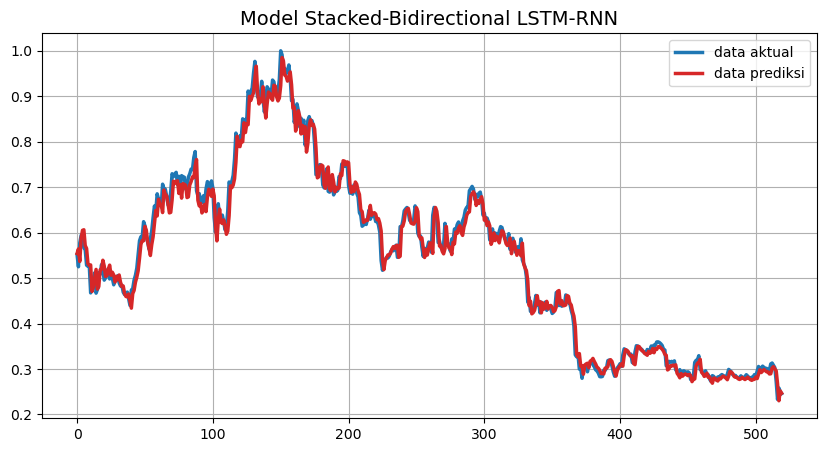

In [21]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(y_test, color="tab:blue", label="data aktual", linewidth=2.5)
ax.plot(predictions, color="tab:red", label="data prediksi", linewidth=2.5)

# membuat label-label
ax.set_title("Model Stacked-Bidirectional LSTM-RNN", fontsize=14)
ax.legend(loc="best")
ax.grid(True)

# menampilka
plt.show()

In [22]:
# inverse value test predictions
testPredictions = scaler.inverse_transform(predictions)

In [23]:
# shift test predictions for plotting
testPredictionsPlot = np.empty_like(scaled_data)
testPredictionsPlot[:, :] = np.nan
testPredictionsPlot[(len(dataset) - testPredictions.shape[0]):len(dataset), :] = testPredictions

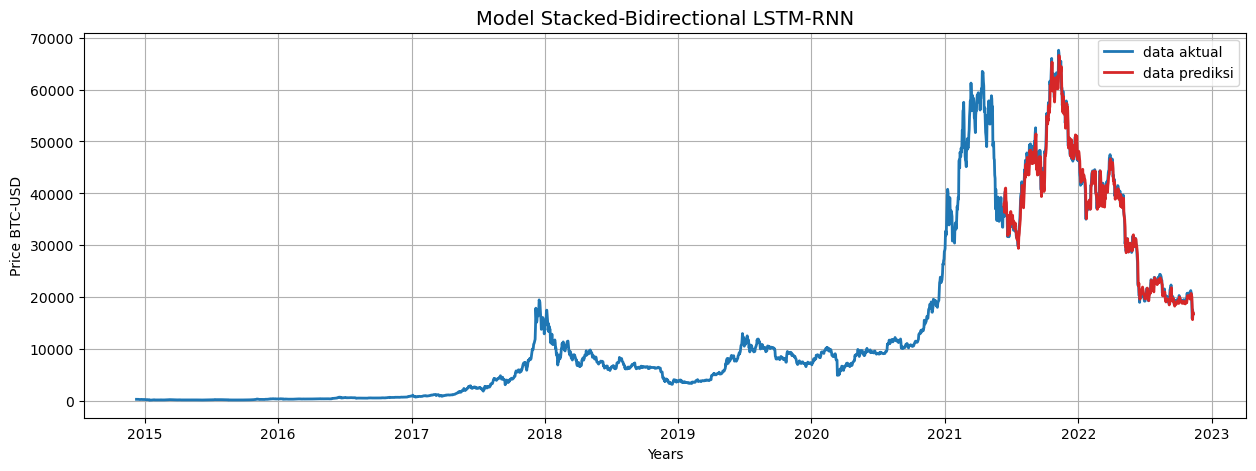

In [24]:
# membuat frame
fig, ax = plt.subplots(figsize = (15,5))

# membuat time series plot
ax.plot(dataset.index.values, scaler.inverse_transform(scaled_data), color="tab:blue", label="data aktual", linewidth=2)
ax.plot(dataset.index.values, testPredictionsPlot, color="tab:red", label="data prediksi", linewidth=2)

# membuat label-label
ax.set_title("Model Stacked-Bidirectional LSTM-RNN", fontsize=14)
ax.set_xlabel("Years", fontsize=10)
ax.set_ylabel("Price BTC-USD", fontsize=10)
ax.legend(loc="best")
ax.grid(True)

# menampilkan plot
plt.show()